In [1]:
#pull out figures for presentation purpose. 

import sys
path = '/low_rank'
sys.path.append(path)
from mc import generate_experiment_data

p = generate_experiment_data(no_generate=True)


100%|██████████| 36/36 [00:00<00:00, 103068.22it/s]


In [2]:
from mc import generate_experiment_data, solver_params
p_solvers = solver_params()
print(len(p_solvers))


54


In [3]:
from itertools import product

from tqdm import tqdm
from util import load_obj

Res = {}
for ap, apsolver in tqdm(product(p, p_solvers)):
    name = "_".join([ap._str(), apsolver._str()])
    Res[(ap, apsolver)] = load_obj(name)
    
    

1944it [00:16, 116.72it/s]


In [4]:
import pandas as pd
import numpy as np
from mc import GDSolverParam, to_frame, build_opt_p

use_solvers = [psolver for psolver in p_solvers] # if psolver.estk==100]
res_df = pd.concat(
    [build_opt_p(pp, use_solvers, Res) for pp in tqdm(p)], axis=0, ignore_index=True
)
res_df


100%|██████████| 36/36 [00:12<00:00,  2.79it/s]


,n,k,std,p_train,p_val,power_law,estk,lr,scale_init,mse,corr,val_loss,val_misclass,seed,iters,n_iter,early_stop,mean_corr,pred_corr,improved_corr
0,1000,5,1,0.7,0.3,True,5.0,0.0030,0.1,0.087347,0.960594,0.690122,0.349359,0.0,139.0,200,False,0.960656,0.999938,0.960661
1,1000,5,1,0.2,0.3,True,5.0,0.0030,0.1,0.531128,0.778085,0.697851,0.381338,0.0,199.0,200,False,0.756845,0.785412,0.828533
2,1000,5,1,0.1,0.1,True,5.0,0.0030,0.1,1.064687,0.542230,0.708520,0.426020,1.0,199.0,200,False,0.529349,0.552763,0.638247
3,1000,5,10,0.7,0.3,True,5.0,0.0030,1.0,4.679602,0.979426,0.546962,0.071194,2.0,189.0,200,False,0.979284,0.999974,0.979339
4,1000,5,10,0.2,0.3,True,5.0,0.0030,1.0,22.481577,0.932583,0.554068,0.081782,1.0,179.0,200,False,0.930229,0.995942,0.932598
5,1000,5,10,0.1,0.1,True,10.0,0.0030,0.1,41.443911,0.893866,0.569447,0.106674,1.0,199.0,200,False,0.888826,0.972132,0.899124
6,1000,50,1,0.7,0.3,True,10.0,0.0030,0.1,0.365955,0.820434,0.696113,0.370814,0.0,199.0,200,False,0.820173,0.931192,0.838692
7,1000,50,1,0.2,0.3,True,5.0,0.0030,0.1,0.795823,0.599668,0.706922,0.412790,2.0,199.0,200,False,0.592905,0.695892,0.667136
8,1000,50,1,0.1,0.1,True,5.0,0.0030,0.1,1.231071,0.416686,0.713873,0.442361,1.0,199.0,200,False,0.304806,0.342120,0.463902
9,1000,50,10,0.7,0.3,True,100.0,0.0030,0.1,24.781753,0.937680,0.570922,0.119794,1.0,89.0,200,False,0.937357,0.972210,0.946326


In [5]:
#optimal models for sampling rate = 0.7
#Note: estimated k, learning rates, and initialization scales need to be tuned together. 

import matplotlib.pyplot as plt


idx = (res_df['p_train'] == 0.7) & (res_df['k']!=500) # & res_df['power_law'] == True
present_res = res_df[idx].set_index(['power_law', 'k', 'std'])
present_res = present_res.rename(columns={'scale_init': 'scale'})

print(present_res[['estk', 'lr', 'scale', 'corr']].to_latex())


\begin{tabular}{lllrrrr}
\toprule
      &    &    &   estk &     lr &  scale &      corr \\
power\_law & k & std &        &        &        &           \\
\midrule
True  & 5  & 1  &    5.0 &  0.003 &    0.1 &  0.960594 \\
      &    & 10 &    5.0 &  0.003 &    1.0 &  0.979426 \\
      & 50 & 1  &   10.0 &  0.003 &    0.1 &  0.820434 \\
      &    & 10 &  100.0 &  0.003 &    0.1 &  0.937680 \\
False & 5  & 1  &    5.0 &  0.001 &    1.0 &  0.962755 \\
      &    & 10 &    5.0 &  0.003 &    1.0 &  0.982813 \\
      & 50 & 1  &  100.0 &  0.003 &    0.1 &  0.490256 \\
      &    & 10 &  100.0 &  0.003 &    0.1 &  0.954054 \\
\bottomrule
\end{tabular}



In [6]:
#optimal models for sampling rate = 0.7
#Note: estimated k, learning rates, and initialization scales need to be tuned together. 
import matplotlib.pyplot as plt

idx = (res_df['p_train'] == 0.2) & (res_df['k']!=500) # & res_df['power_law'] == True
present_res = res_df[idx].set_index(['power_law', 'k', 'std'])
present_res = present_res.rename(columns={'scale_init': 'scale'})

print(present_res[['estk', 'lr', 'scale', 'corr']].to_latex())


\begin{tabular}{lllrrrr}
\toprule
      &    &    &   estk &     lr &  scale &      corr \\
power\_law & k & std &        &        &        &           \\
\midrule
True  & 5  & 1  &    5.0 &  0.003 &    0.1 &  0.778085 \\
      &    & 10 &    5.0 &  0.003 &    1.0 &  0.932583 \\
      & 50 & 1  &    5.0 &  0.003 &    0.1 &  0.599668 \\
      &    & 10 &   10.0 &  0.003 &    1.0 &  0.847567 \\
False & 5  & 1  &    5.0 &  0.003 &    1.0 &  0.843560 \\
      &    & 10 &    5.0 &  0.003 &    1.0 &  0.942748 \\
      & 50 & 1  &  100.0 &  0.003 &    0.1 &  0.128606 \\
      &    & 10 &  100.0 &  0.003 &    0.1 &  0.535606 \\
\bottomrule
\end{tabular}



In [7]:
#optimal models for sampling rate = 0.7
#Note: estimated k, learning rates, and initialization scales need to be tuned together. 
import matplotlib.pyplot as plt

idx = (res_df['p_train'] == 0.1) & (res_df['k']!=500) # & res_df['power_law'] == True
present_res = res_df[idx].set_index(['power_law', 'k', 'std'])
present_res = present_res.rename(columns={'scale_init': 'scale'})

print(present_res[['estk', 'lr', 'scale', 'corr']].to_latex())


\begin{tabular}{lllrrrr}
\toprule
      &    &    &   estk &     lr &  scale &      corr \\
power\_law & k & std &        &        &        &           \\
\midrule
True  & 5  & 1  &    5.0 &  0.003 &    0.1 &  0.542230 \\
      &    & 10 &   10.0 &  0.003 &    0.1 &  0.893866 \\
      & 50 & 1  &    5.0 &  0.003 &    0.1 &  0.416686 \\
      &    & 10 &   10.0 &  0.003 &    0.1 &  0.737816 \\
False & 5  & 1  &    5.0 &  0.003 &    0.1 &  0.296313 \\
      &    & 10 &    5.0 &  0.003 &    0.1 &  0.903533 \\
      & 50 & 1  &   10.0 &  0.003 &    1.0 &  0.024961 \\
      &    & 10 &  100.0 &  0.003 &    0.1 &  0.231770 \\
\bottomrule
\end{tabular}



In [8]:
import pandas as pd
full_res_df = pd.concat(
    [build_opt_p(pp, [use_solvers], Res) for pp, use_solvers in tqdm(product(p, p_solvers))], axis=0, ignore_index=True
)

1944it [02:38, 12.23it/s]


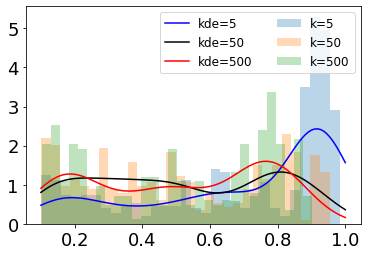

In [9]:
import matplotlib.pyplot as plt
from scipy import stats

fontsize=18
df = full_res_df.copy()
start = .1
df = df[df['corr'] > start]
kwargs5 = dict(histtype='stepfilled', density=True, alpha=0.3, bins=30, label='k=5')
kwargs50 = dict(histtype='stepfilled', density=True, alpha=0.3, bins=30, label='k=50')
kwargs500 = dict(histtype='stepfilled', density=True, alpha=0.3, bins=30, label='k=500')
idx5 = df['k'] == 5
idx50 = df['k'] == 50
idx500 = df['k'] == 500

plt.hist(data=df[idx5], x='corr', **kwargs5)
kde = stats.gaussian_kde(df[idx5]['corr'])
xx = np.linspace(start, 1, 100)
plt.plot(xx, kde(xx), 'b', label='kde=5')

plt.hist(data=df[idx50], x='corr', **kwargs50);
kde = stats.gaussian_kde(df[idx50]['corr'])
xx = np.linspace(start, 1, 100)
plt.plot(xx, kde(xx), 'k', label='kde=50')


plt.hist(data=df[idx500], x='corr', **kwargs500);
kde = stats.gaussian_kde(df[idx500]['corr'])
xx = np.linspace(start, 1, 100)
plt.plot(xx, kde(xx), 'r', label='kde=500')

plt.legend(loc='upper right', fontsize=12, ncol=2)
plt.tick_params(axis="both", which="major", labelsize=fontsize)
plt.savefig('differentk.png')

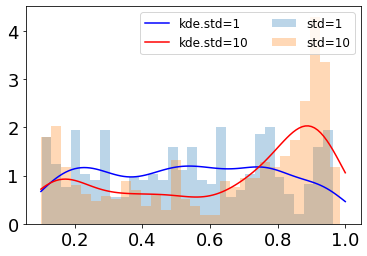

In [10]:
import matplotlib.pyplot as plt
from scipy import stats

fontsize=18
kwargsstd1 = dict(histtype='stepfilled', density=True, alpha=0.3, bins=30, label='std=1')
kwargsstd10 = dict(histtype='stepfilled', density=True, alpha=0.3, bins=30, label='std=10')
idx1 = df['std'] == 1
idx10 = df['std'] == 10

plt.hist(data=df[idx1], x='corr', **kwargsstd1)
kde = stats.gaussian_kde(df[idx1]['corr'])
xx = np.linspace(start, 1, 100)
plt.plot(xx, kde(xx), 'b', label='kde.std=1')

plt.hist(data=df[idx10], x='corr', **kwargsstd10);
kde = stats.gaussian_kde(df[idx10]['corr'])
xx = np.linspace(start, 1, 100)
plt.plot(xx, kde(xx), 'r', label='kde.std=10')



plt.legend(loc='upper right', fontsize=12, ncol=2)
plt.tick_params(axis="both", which="major", labelsize=fontsize)
plt.savefig('differentstd.png')

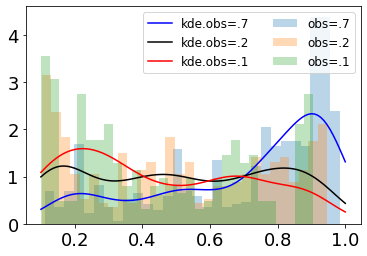

In [11]:
import matplotlib.pyplot as plt
from scipy import stats

fontsize=18
kwargsp7 = dict(histtype='stepfilled', density=True, alpha=0.3, bins=30, label='obs=.7')
kwargsp2 = dict(histtype='stepfilled', density=True, alpha=0.3, bins=30, label='obs=.2')
kwargsp1 = dict(histtype='stepfilled', density=True, alpha=0.3, bins=30, label='obs=.1')
idx7 = df['p_train'] == .7
idx2 = df['p_train'] == .2
idx1 = df['p_train'] == .1

plt.hist(data=df[idx7], x='corr', **kwargsp7)
kde = stats.gaussian_kde(df[idx7]['corr'])
xx = np.linspace(start, 1, 100)
plt.plot(xx, kde(xx), 'b', label='kde.obs=.7')

plt.hist(data=df[idx2], x='corr', **kwargsp2);
kde = stats.gaussian_kde(df[idx2]['corr'])
xx = np.linspace(start, 1, 100)
plt.plot(xx, kde(xx), 'k', label='kde.obs=.2')


plt.hist(data=df[idx1], x='corr', **kwargsp1);
kde = stats.gaussian_kde(df[idx1]['corr'])
xx = np.linspace(start, 1, 100)
plt.plot(xx, kde(xx), 'r', label='kde.obs=.1')


plt.legend(loc='upper right', fontsize=12, ncol=2)
plt.tick_params(axis="both", which="major", labelsize=fontsize)

plt.savefig('differentobs.png')

In [ ]:
#are local optimal the same. 

import attr
from itertools import product
#keep unique solver. 
import math
use_solvers = [p_solver for p_solver in p_solvers if p_solver.random_seed == 0]

def _expand_solver(psolver):
    return [attr.evolve(psolver, random_seed = i) for i in [1,2]]
    

use_p = p[0]
df_res = []

for use_p, use_solver in tqdm(product(p, use_solvers)):
    df_res.append(build_opt_p(use_p, _expand_solver(use_solver), Res))

df_merged = pd.concat(df_res,axis=0, ignore_index=True)
df_merged



#prediction correlation vs improvement ratio. 
keep_idx = ((df_merged['improved_corr'] /df_merged['mean_corr']) < 3) & (df_merged['mean_corr'] > .15)

rg_rho = np.linspace(0, 1, 100)
#rg_rho = [1]
scales = []
for rho in rg_rho:
    n_estimators = 3
    std_sum = np.sqrt(n_estimators + 2 * math.comb(n_estimators,2) * rho)
    scale = (n_estimators / std_sum)**2
    scales.append(scale)





431it [00:40, 10.59it/s]

In [ ]:


fontsize=30
fig, axs = plt.subplots(1, 3, figsize=(30, 6))
improve_ratio = (df_merged[keep_idx]['improved_corr'] / df_merged[keep_idx]['mean_corr'])**2
axs[0].hist(df_merged['pred_corr'], bins=20, label='distribution of corr')
axs[0].scatter(df_merged['mean_corr']**2, df_merged['pred_corr'])
axs[0].tick_params(axis="both", which="major", labelsize=fontsize)
axs[0].legend(loc='upper right', fontsize=fontsize)

train_x = df_merged['mean_corr']
train_y = df_merged['pred_corr']

weights = np.polyfit(train_x**2, train_y, 3)

model = np.poly1d(weights)
xp = np.linspace((train_x**2).min(),train_x.max(),70)
pred_plot = model(xp)
#plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
axs[1].scatter(train_x**2, train_y)
axs[1].plot(xp, pred_plot,'r', linewidth=4, label='fit poly')
axs[1].tick_params(axis="both", which="major", labelsize=fontsize)
axs[1].legend(loc='lower right', fontsize=fontsize)


axs[2].scatter(df_merged[keep_idx]['pred_corr'], improve_ratio)
axs[2].plot(rg_rho, scales, 'r', linewidth=4, label='theoretical improvement')
axs[2].tick_params(axis="both", which="major", labelsize=fontsize)
axs[2].legend(loc='upper right', fontsize=fontsize)


In [ ]:
fig.savefig('boosting.png')